In [1]:
import numpy as np
import matplotlib.pyplot as plt
from problem_1.FEMpoisson import FEMPoissonSolver

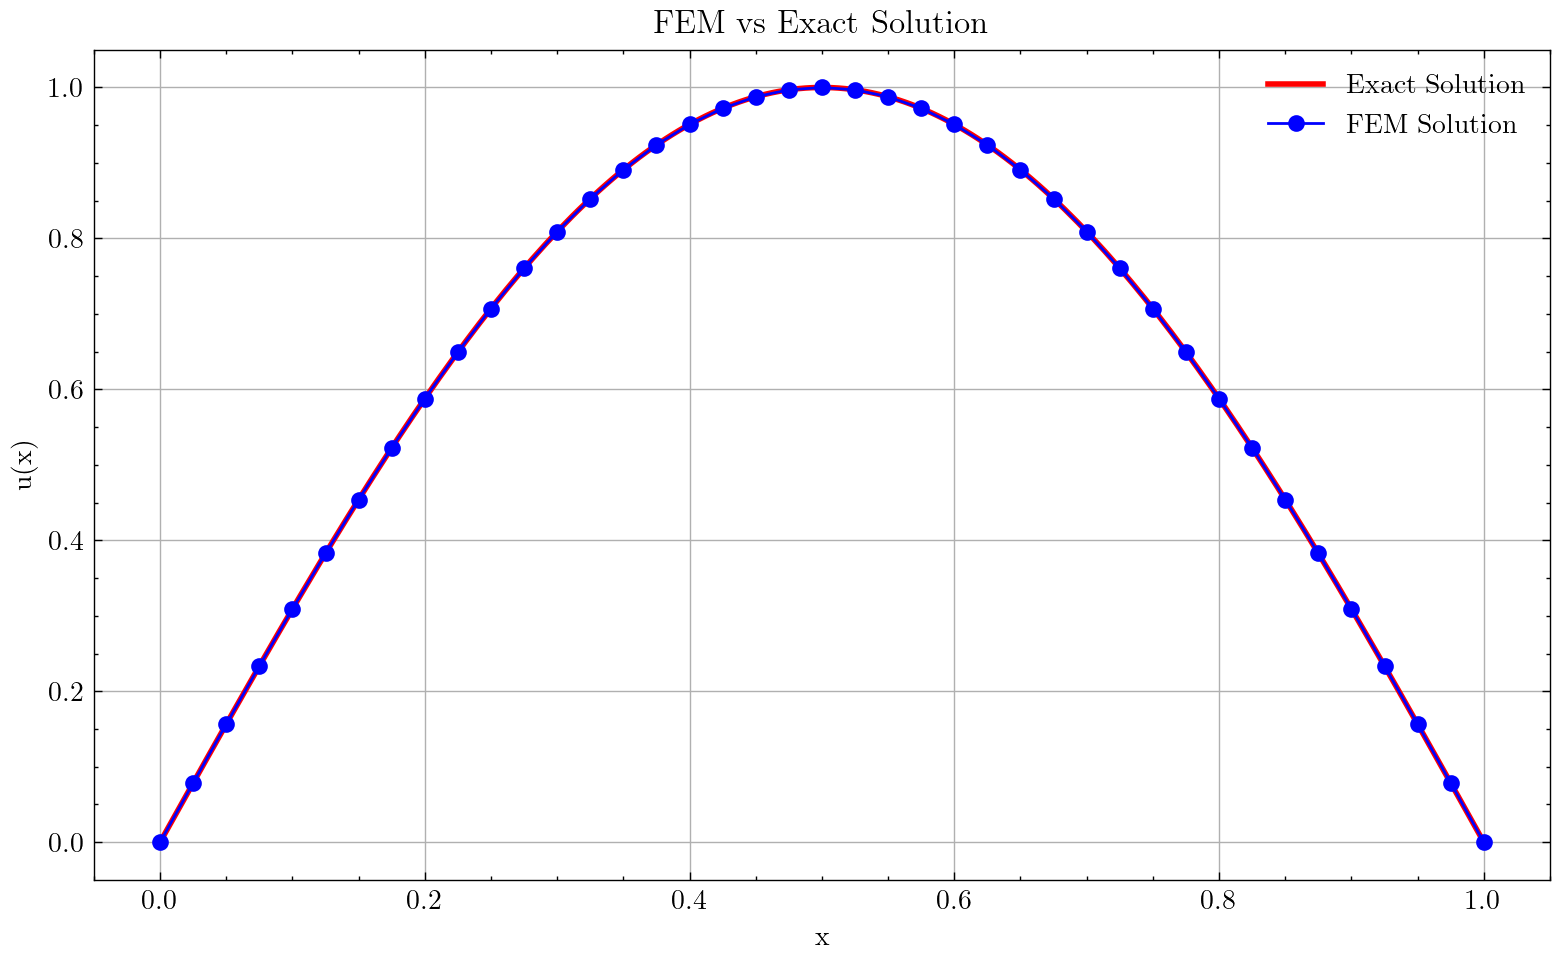

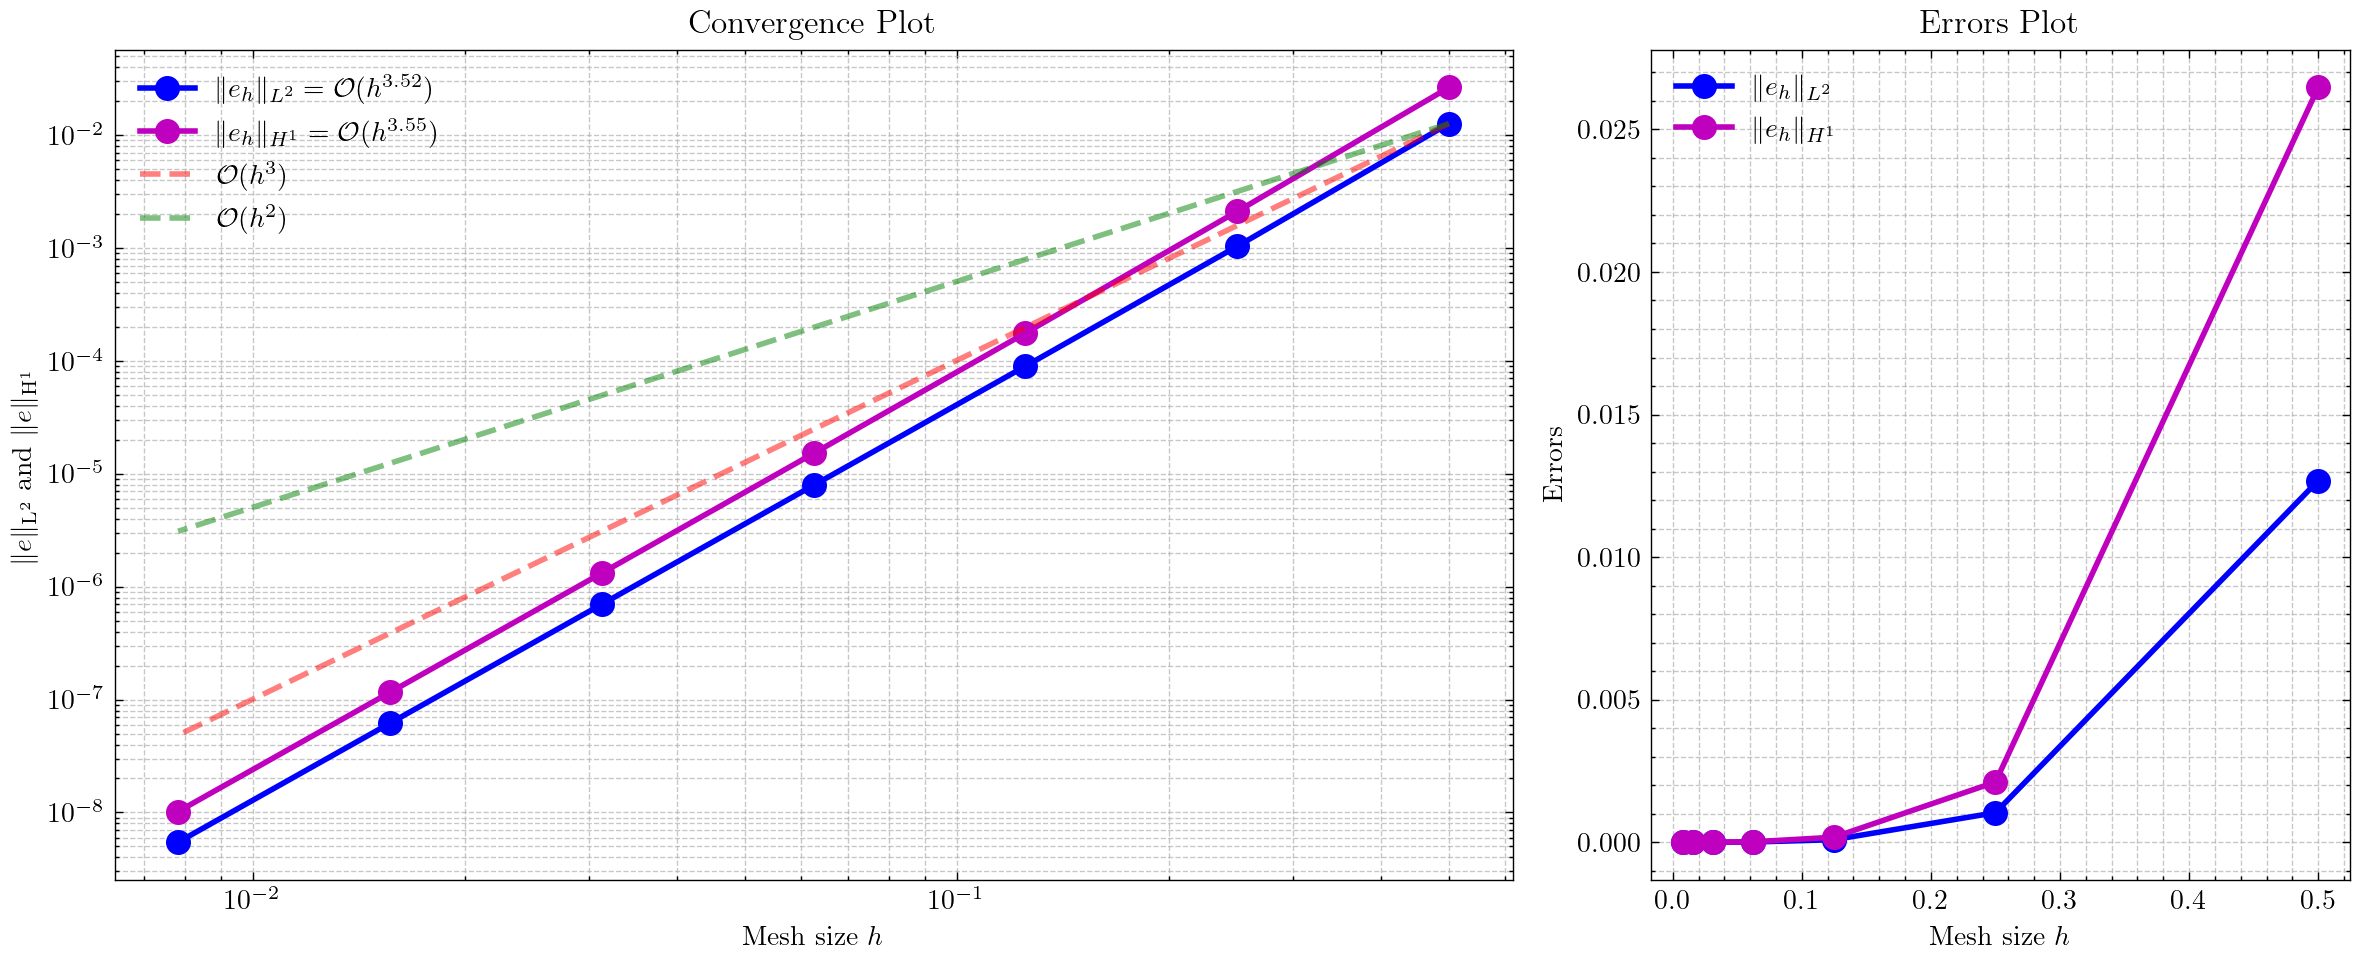


                              Convergence Analysis                              
    M         h      L2 Error  Rate L2   Ratio L2  H1 Error  Rate H1   Ratio H1 
--------------------------------------------------------------------------------
    2      5.00e-01  1.27e-02     -         -      2.65e-02     -         -     
    4      2.50e-01  1.04e-03    3.61     12.24    2.11e-03    3.65     12.54   
    8      1.25e-01  8.99e-05    3.53     11.53    1.77e-04    3.58     11.96   
    16     6.25e-02  7.91e-06    3.51     11.37    1.52e-05    3.54     11.65   
    32     3.12e-02  6.98e-07    3.50     11.33    1.32e-06    3.52     11.48   
    64     1.56e-02  6.17e-08    3.50     11.32    1.16e-07    3.51     11.40   
   128     7.81e-03  5.45e-09    3.50     11.32    1.02e-08    3.51     11.36   
Overall convergence rates - L2: 3.52, H1: 3.55
Final errors - L2: 5.45e-09, H1: 1.02e-08



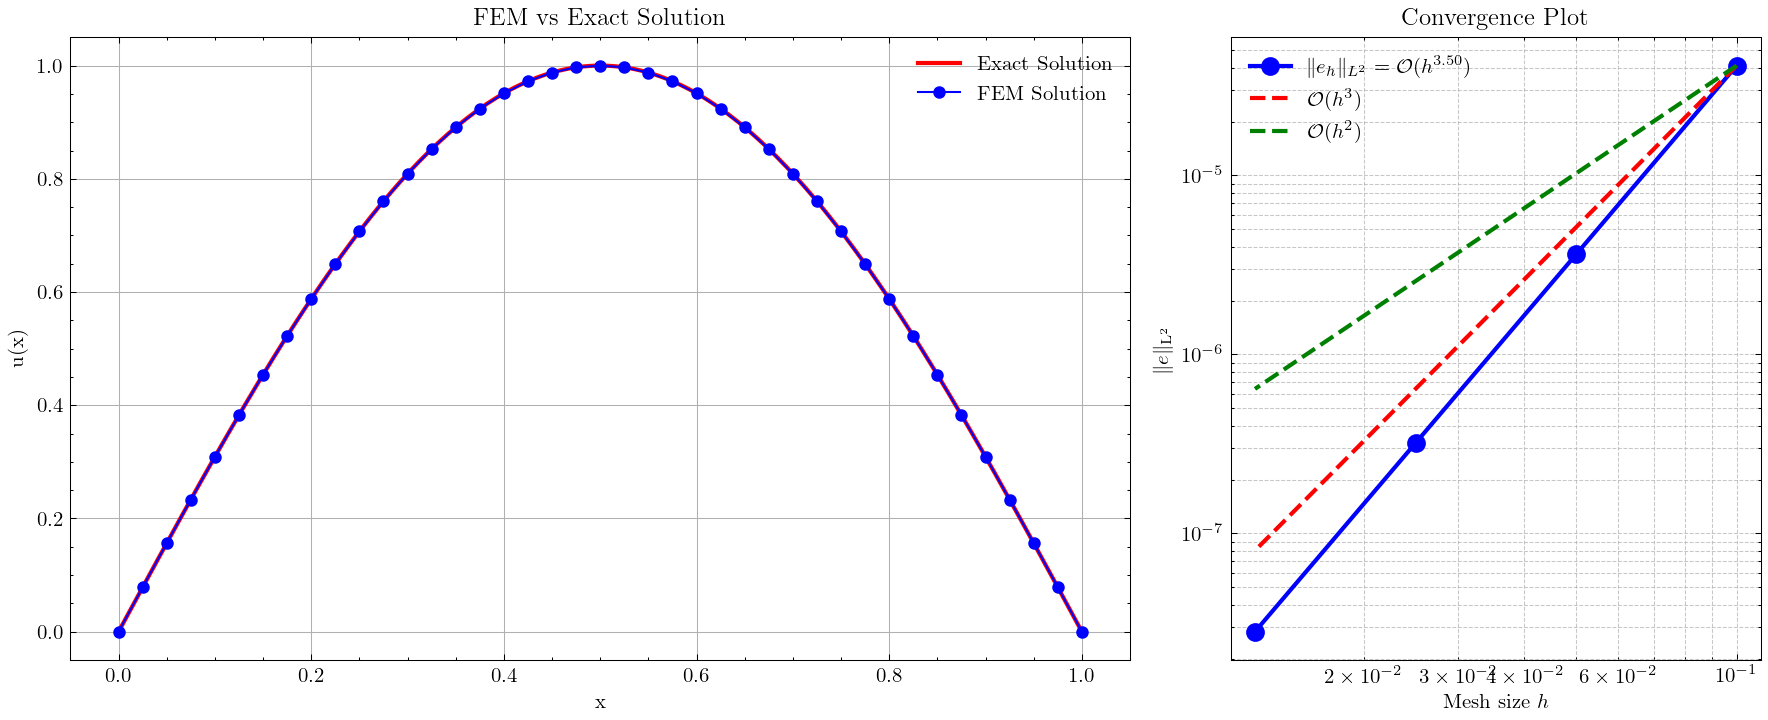

In [ ]:

f2 = lambda x: np.pi**2 * np.sin(np.pi*x)
exact2 = lambda x: np.sin(np.pi*x)
solver2 = FEMPoissonSolver(M=20, f=f2, exact=exact2)
solver2.assemble()
solver2.solve()
solver2.plot_solution(name='2')
solver2.plot_convergence(name='2')
solver2.print_convergence_table()
solver2.plot(fine_mesh=200, name='2')

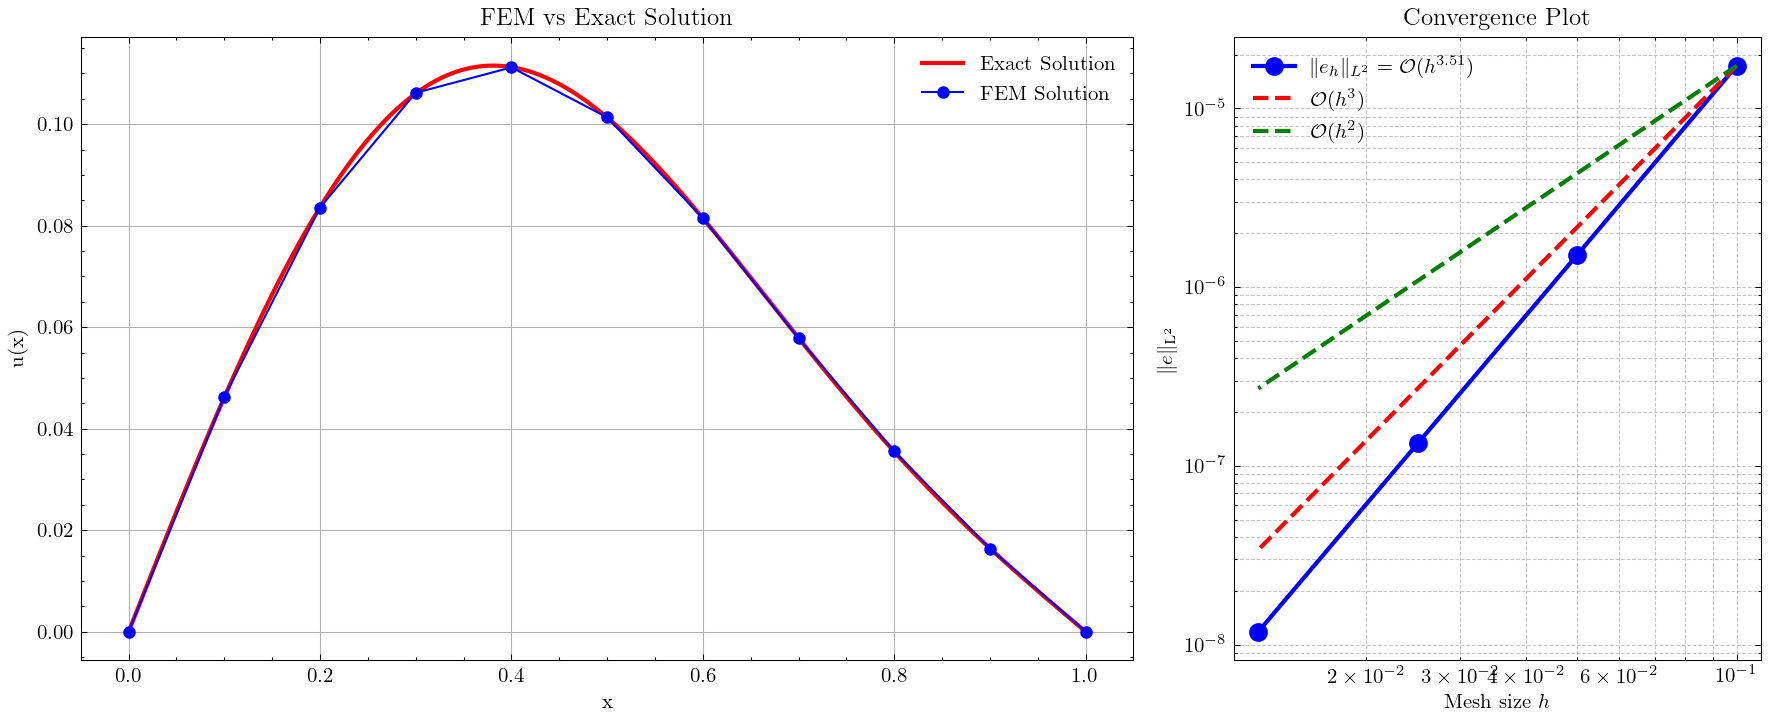

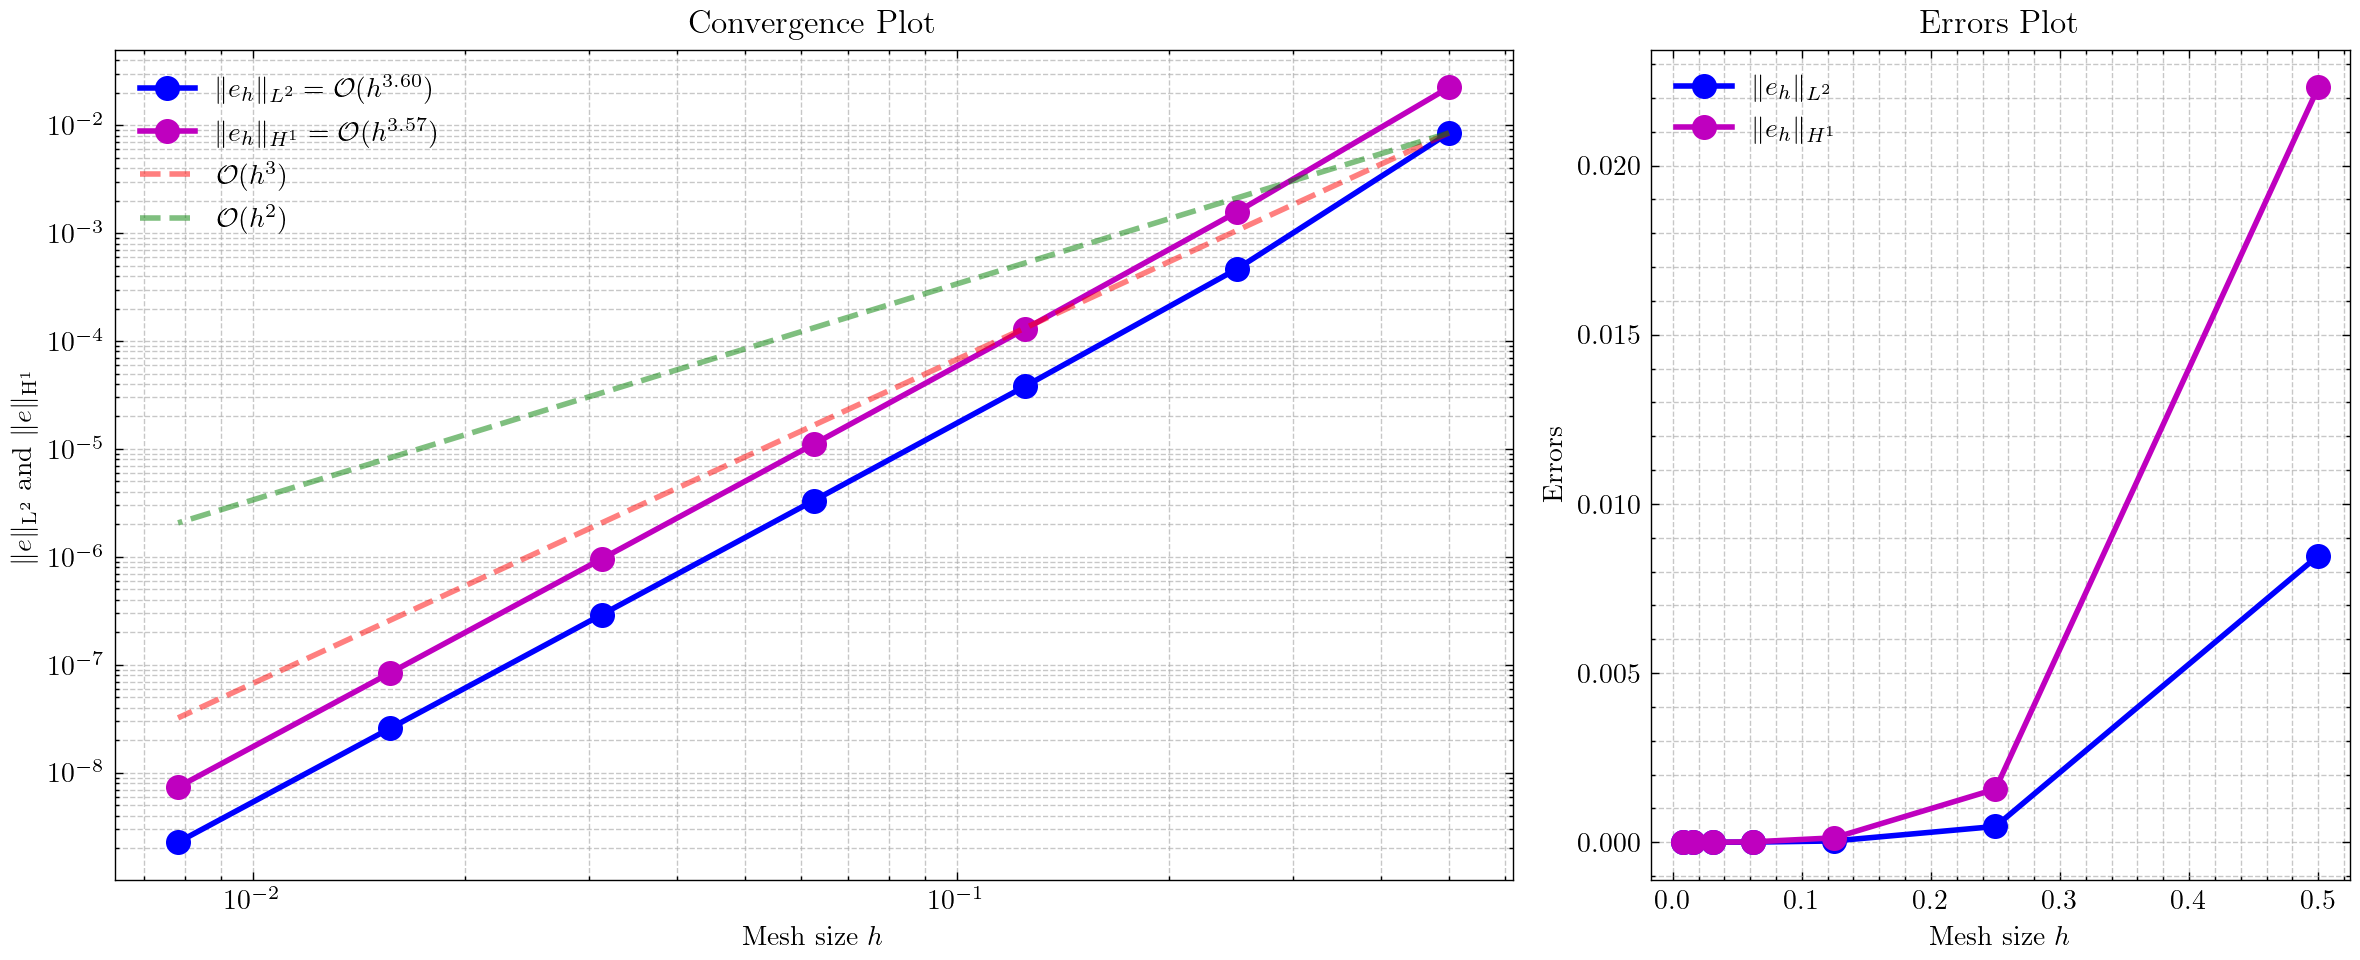


                              Convergence Analysis                              
    M         h      L2 Error  Rate L2   Ratio L2  H1 Error  Rate H1   Ratio H1 
--------------------------------------------------------------------------------
    2      5.00e-01  8.47e-03     -         -      2.23e-02     -         -     
    4      2.50e-01  4.66e-04    4.18     18.16    1.57e-03    3.83     14.22   
    8      1.25e-01  3.82e-05    3.61     12.20    1.30e-04    3.60     12.10   
    16     6.25e-02  3.32e-06    3.53     11.52    1.11e-05    3.55     11.73   
    32     3.12e-02  2.92e-07    3.51     11.36    9.60e-07    3.53     11.53   
    64     1.56e-02  2.58e-08    3.50     11.33    8.40e-08    3.51     11.42   
   128     7.81e-03  2.28e-09    3.50     11.32    7.39e-09    3.51     11.37   
Overall convergence rates - L2: 3.60, H1: 3.57
Final errors - L2: 2.28e-09, H1: 7.39e-09



In [3]:

def u_exact_test4(x):
    return (1.0 / (np.pi**2)) * np.sin(np.pi * x) + (1.0 / (4 * np.pi**2)) * np.sin(2 * np.pi * x)
def f_test4(x):
    return np.sin(np.pi * x) + np.sin(2 * np.pi * x)
solver4 = FEMPoissonSolver(M=5, f=f_test4, exact=u_exact_test4)
solver4.assemble()
solver4.solve()
solver4.plot(fine_mesh=200, name='4')
solver4.plot_convergence(name='4')
solver4.print_convergence_table()

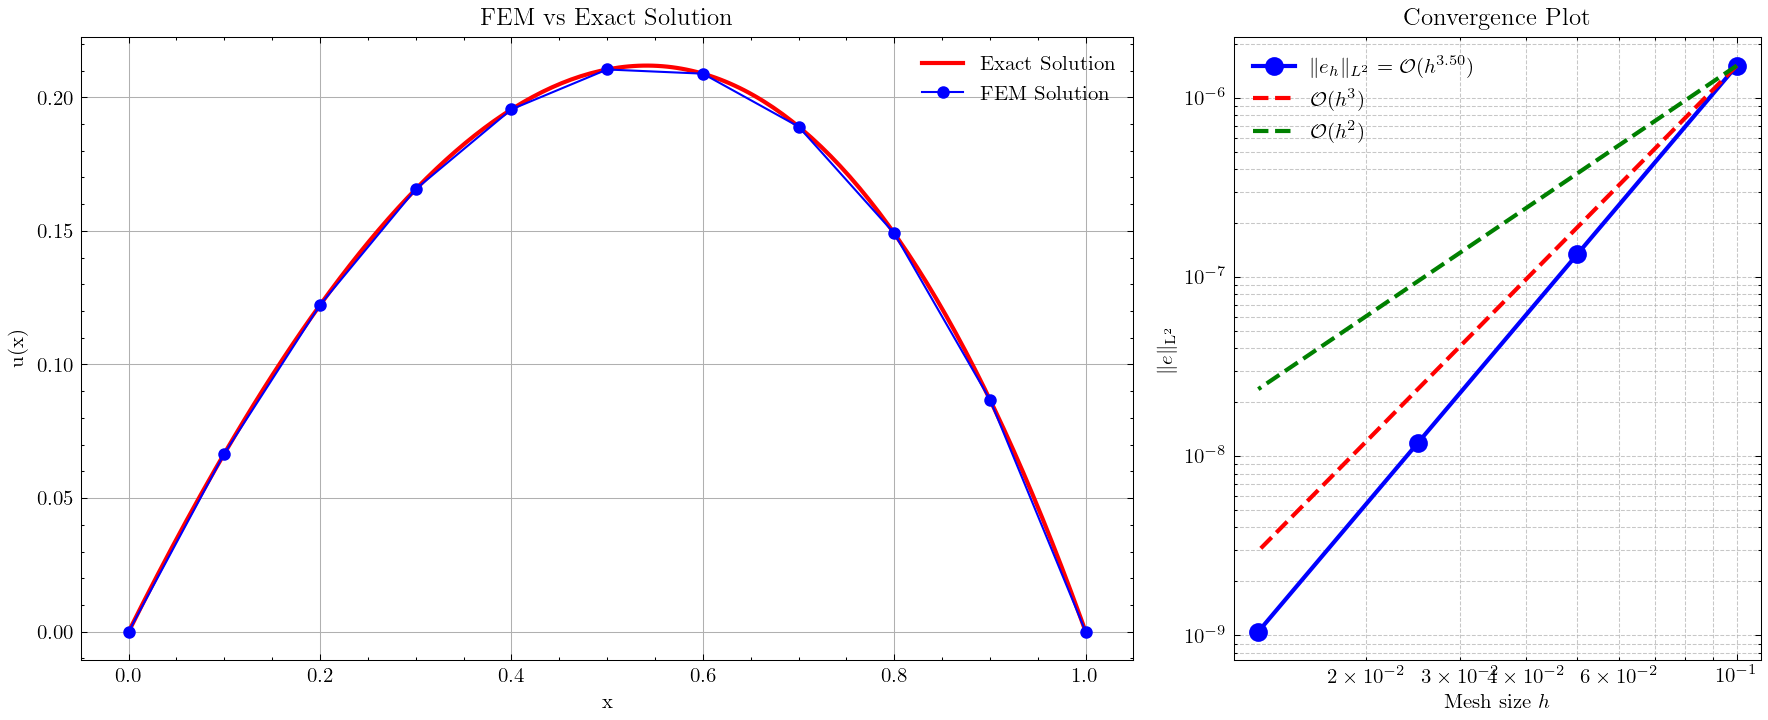

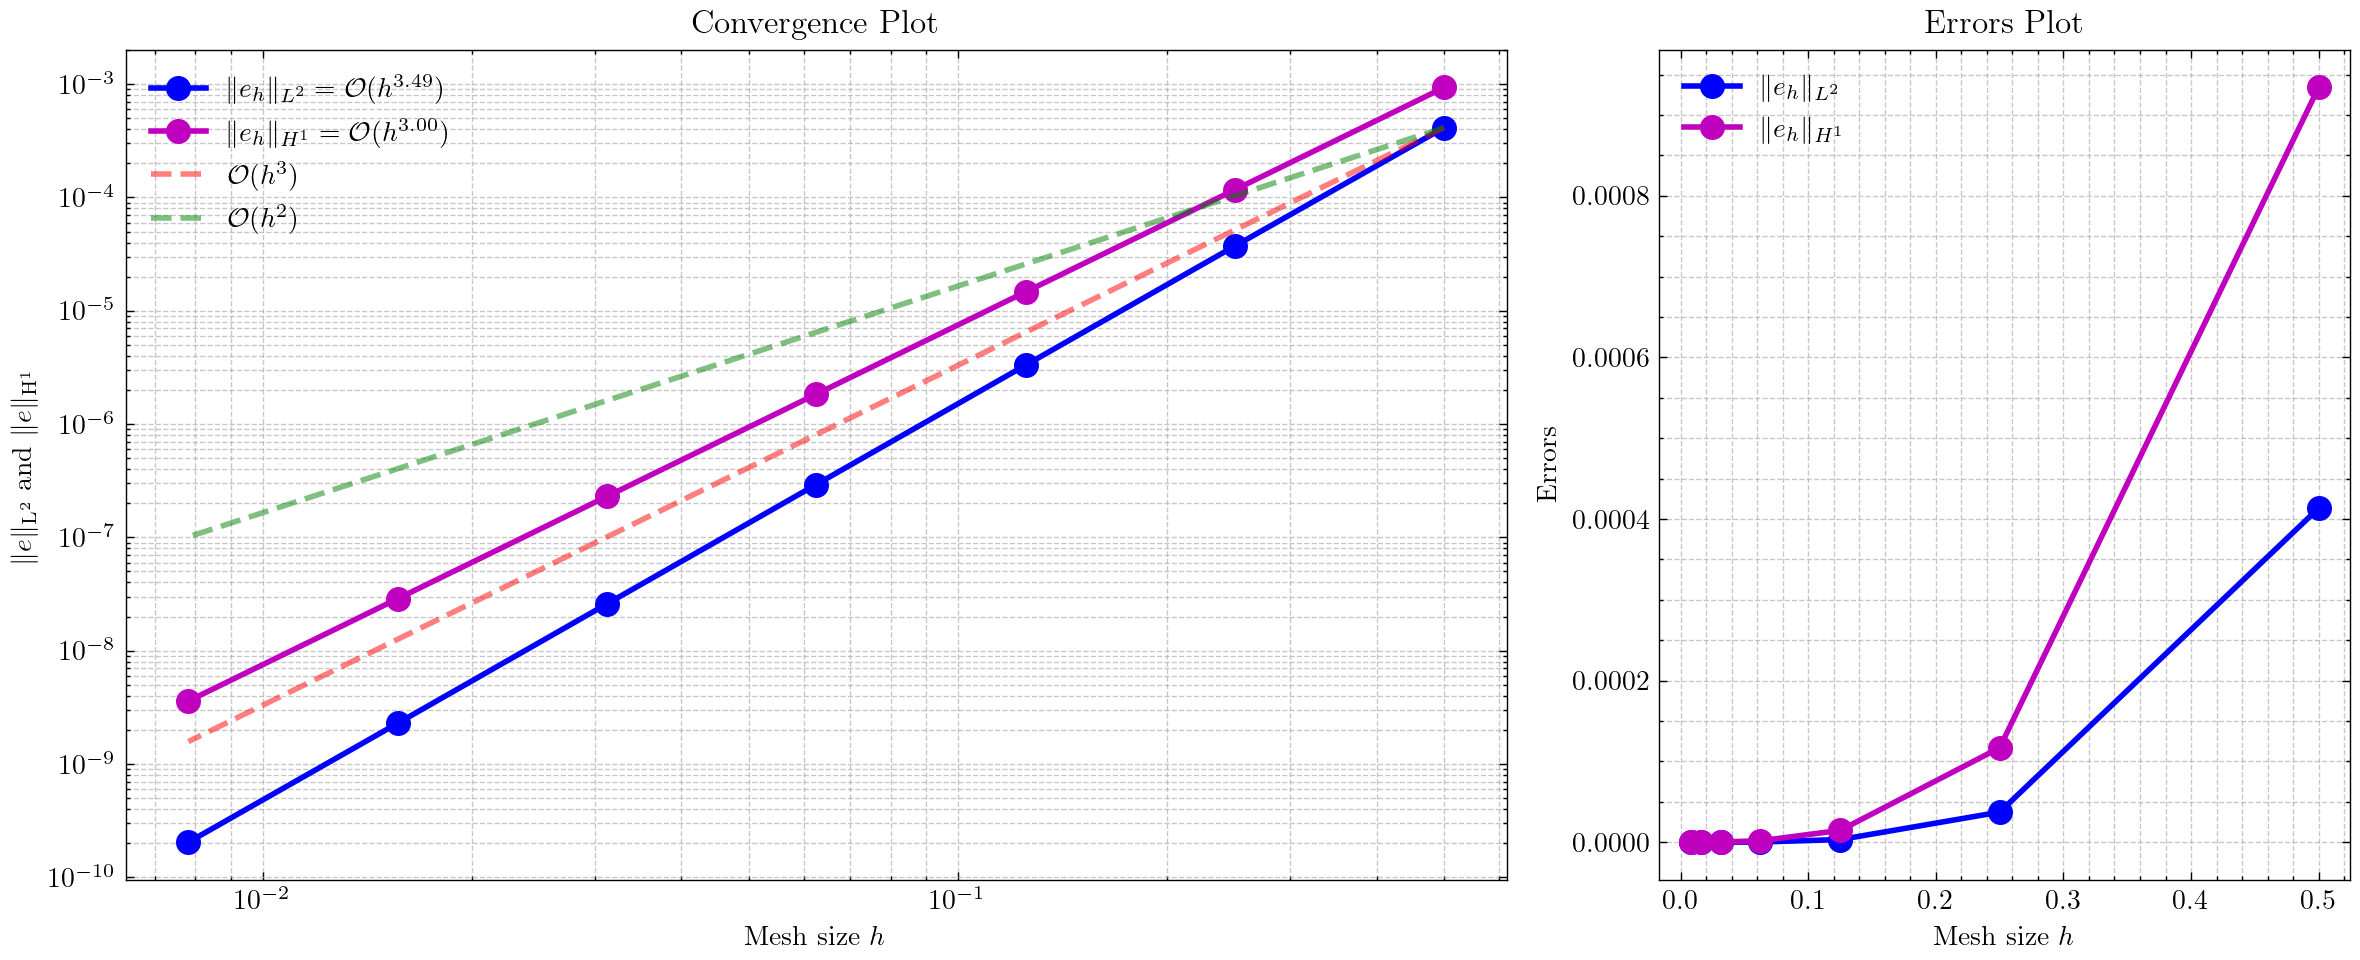


                              Convergence Analysis                              
    M         h      L2 Error  Rate L2   Ratio L2  H1 Error  Rate H1   Ratio H1 
--------------------------------------------------------------------------------
    2      5.00e-01  4.13e-04     -         -      9.34e-04     -         -     
    4      2.50e-01  3.72e-05    3.47     11.10    1.17e-04    3.00      7.99   
    8      1.25e-01  3.31e-06    3.49     11.26    1.47e-05    3.00      7.98   
    16     6.25e-02  2.93e-07    3.50     11.30    1.84e-06    3.00      7.98   
    32     3.12e-02  2.59e-08    3.50     11.31    2.30e-07    3.00      7.99   
    64     1.56e-02  2.29e-09    3.50     11.31    2.88e-08    3.00      7.99   
   128     7.81e-03  2.04e-10    3.49     11.21    3.60e-09    3.00      8.00   
Overall convergence rates - L2: 3.49, H1: 3.00
Final errors - L2: 2.04e-10, H1: 3.60e-09



In [4]:
def f_test3(x): return np.exp(x)
def u_exact_test3(x): return -np.exp(x) + (np.e - 1)*x + 1

solver3 = FEMPoissonSolver(M=5, f=f_test3, exact=u_exact_test3)
solver3.assemble()
solver3.solve()
solver3.plot(fine_mesh=200, name='5')
solver3.plot_convergence(name='5')
solver3.print_convergence_table()


In [5]:
def f(x):
    return np.pi**2 * np.sin(np.pi*x)

# Define mesh (example: non-uniform points or uniform linspace)
x_nodes = np.array([0, 0.2, 0.5, 0.7, 1.0])  # example non-uniform mesh

def assemble_stiffness_matrix(f, x_nodes):

    N = len(x_nodes) - 1

# Assign global indices for interior node and midpoint DoFs
    node_index = [-1] * (N + 1)
    mid_index = [None] * N
    glob_idx = 0
    for j in range(1, N):       # interior nodes
        node_index[j] = glob_idx
        glob_idx += 1
    for i in range(N):          # midpoints
        mid_index[i] = glob_idx
        glob_idx += 1

# Initialize global stiffness matrix K and load vector F
    size = glob_idx
    K = np.zeros((size, size))
    F = np.zeros(size)

# Assemble the global stiffness matrix and load vector
    psi_vals = {0: np.array([1, 0, 0]),
            0.5: np.array([0, 1, 0]),
            1: np.array([0, 0, 1])}
    psi_prime = {0: np.array([-3, 4, -1]),
             0.5: np.array([-1, 0, 1]),
             1: np.array([1, -4, 3])}

    for i in range(N):
        h_i = x_nodes[i+1] - x_nodes[i]
    # Element stiffness via Simpson's rule on reference [0,1]:
        for a in range(3):
            for b in range(3):
            # Simpson's rule with reference shape function derivatives
                val0 = psi_prime[0][a] * psi_prime[0][b]
                valm = psi_prime[0.5][a] * psi_prime[0.5][b]
                val1 = psi_prime[1][a] * psi_prime[1][b]
                K_elem = (val0 + 4*valm + val1) * (1 / (6 * h_i))  # 1/h  (1/6)[...]
            # Map local (a, b) to global indices
                p = node_index[i] if a == 0 else (mid_index[i] if a == 1 else node_index[i+1])
                q = node_index[i] if b == 0 else (mid_index[i] if b == 1 else node_index[i+1])
                if p != -1 and q != -1:  # both are interior unknowns
                    K[p, q] += K_elem
    # Element load vector via Simpson's rule
        f_left  = f(x_nodes[i])
        f_mid   = f((x_nodes[i] + x_nodes[i+1]) / 2)
        f_right = f(x_nodes[i+1])
        F_elem = np.array([f_left, 4 *f_mid, f_right]) * (h_i / 6)
    # Add to global F
        for a in range(3):
            p = node_index[i] if a == 0 else (mid_index[i] if a == 1 else node_index[i+1])
            if p != -1:
                F[p] += F_elem[a]
    return K,F

K, F = assemble_stiffness_matrix(f, x_nodes)

# Solve KU = F for unknown coefficients U
U = np.linalg.solve(K, F)

def u_exact(x):
    return np.sin(np.pi * x)

def plot_convergence(hs, er, name):
    plt.loglog(hs, er, 'o-', label='L2 Error')
    plt.xlabel('Mesh Size (h)')
    plt.ylabel('L2 Error')
    plt.title(f'Convergence Plot for {name}')
    plt.grid()
    plt.legend()
    plt.show()

    

<Figure size 350x262.5 with 0 Axes>

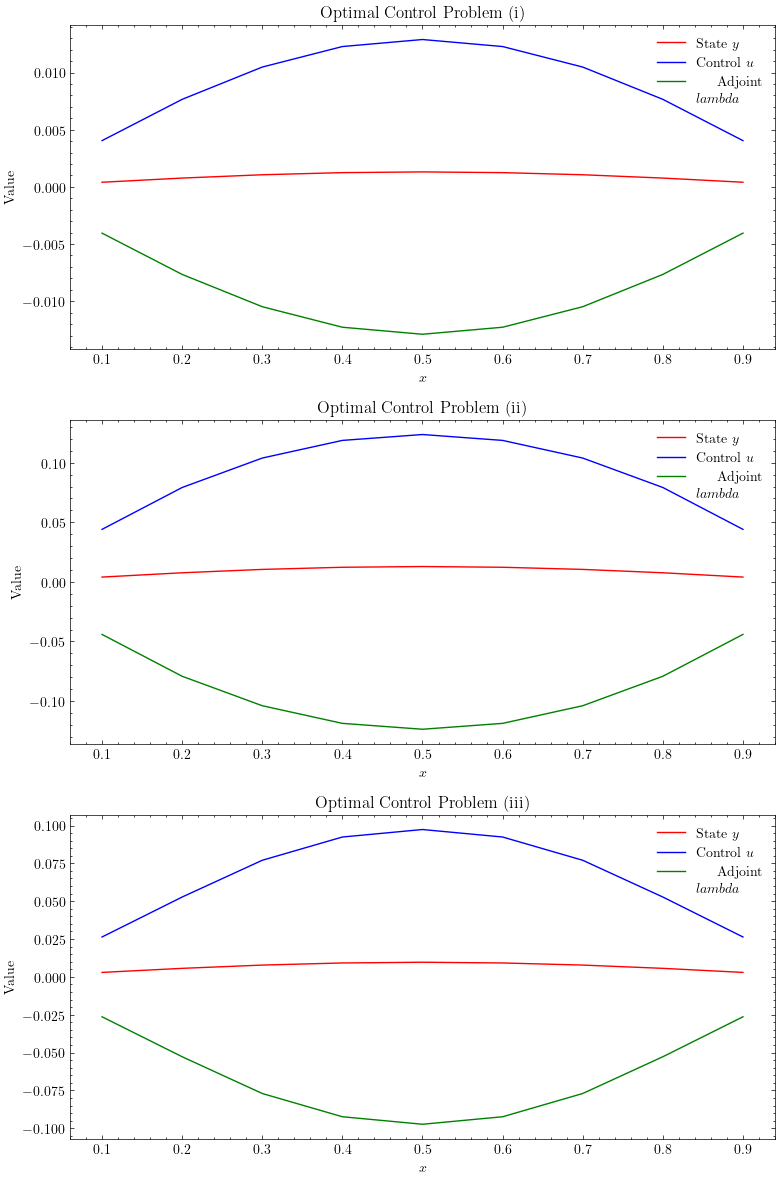

In [6]:

def assemble_FEM_matrices(N):
    """Assemble stiffness matrix B and mass matrix M (size 2N-1) for P2 elements on [0,1]."""
    # Coordinates of nodes (including boundaries and midpoints)
    # There are 2N+1 nodes (including boundaries); interior nodes indexed 1..2N-1
    coords = np.zeros(2*N + 1)
    h = 1.0 / N
    for k in range(N):  # for each element
        coords[2*k] = k * h        # element left endpoint
        coords[2*k + 1] = k*h + h/2  # midpoint
    coords[2*N] = 1.0  # right boundary
    
    # Reference element integrals for P2 (from analytical derivation)
    B_ref = np.array([[7/3,  -8/3,  1/3],
                      [-8/3, 16/3, -8/3],
                      [1/3,  -8/3,  7/3]], dtype=float)
    M_ref = np.array([[ 2/15,  1/15, -1/30],
                      [ 1/15,  8/15,  1/15],
                      [-1/30,  1/15,  2/15]], dtype=float)
    
    # Initialize global matrices (size 2N+1 including boundaries)
    B_full = np.zeros((2*N+1, 2*N+1))
    M_full = np.zeros((2*N+1, 2*N+1))
    # Assembly: add each element's contribution
    for k in range(N):
        # nodes of element k: global indices [2k, 2k+1, 2k+2]
        elem_nodes = [2*k, 2*k+1, 2*k+2]
        h_e = coords[2*k+2] - coords[2*k]  # element length
        # Local matrices scaled by h
        B_loc = (1.0/h_e) * B_ref
        M_loc = h_e * M_ref
        # Add to global matrix
        for a in range(3):
            i = elem_nodes[a]
            for b in range(3):
                j = elem_nodes[b]
                B_full[i,j] += B_loc[a,b]
                M_full[i,j] += M_loc[a,b]
    # Remove boundary rows/cols (Dirichlet 0 at nodes 0 and 2N)
    B = B_full[1:2*N, 1:2*N]
    M = M_full[1:2*N, 1:2*N]
    return coords[1:2*N], B, M  # return interior node coords and matrices

def solve_optimal_control(y_d_func, alpha, N):
    """Solve the optimal control problem for given desired profile function y_d_func and parameter alpha."""
    coords_int, B, M = assemble_FEM_matrices(N)
    # Build discrete target vector (interpolate y_d at interior nodes)
    y_d_vals = y_d_func(coords_int)
    # Solve reduced system: (M B^{-1} M + alpha B) u = M y_d
    # We do this by solving B X = M for X (equivalent to X = B^{-1} M)
    X = np.linalg.solve(B, M)              # solve B * X = M
    A = M.dot(X) + alpha * B               # form M B^{-1} M + alpha B
    rhs = M.dot(y_d_vals)                  # right-hand side M * y_d
    u = np.linalg.solve(A, rhs)            # solve for control coefficients
    y = np.linalg.solve(B, M.dot(u))       # solve B y = M u for state coefficients
    lam = -alpha * u                       # adjoint from optimality condition
    return coords_int, y, u, lam

# Define desired profiles as Python functions for convenience:
y_d1 = lambda x: 0.5 * x * (1 - x)                      # Case (i)
y_d2 = lambda x: np.ones_like(x)                       # Case (ii)
y_d3 = lambda x: np.where((0.25 <= x) & (x <= 0.75), 1.0, 0.0)  # Case (iii)

# Solve optimal control problem for each case
alpha = 1.0
N = 5
coords_int1, y1, u1, lam1 = solve_optimal_control(y_d1, alpha, N)
coords_int2, y2, u2, lam2 = solve_optimal_control(y_d2, alpha, N)
coords_int3, y3, u3, lam3 = solve_optimal_control(y_d3, alpha, N)
# Plot results for each case
plt.clf()
fig, axs = plt.subplots(3, 1, figsize=(8, 12))
axs[0].plot(coords_int1, y1, 'r-', label=r'State $y$')
axs[0].plot(coords_int1, u1, 'b-', label=r'Control $u$')
axs[0].plot(coords_int1, lam1, 'g-', label=r'Adjoint $\\lambda$')
axs[0].set_title('Optimal Control Problem (i)')
axs[0].legend()
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel('Value')
axs[1].plot(coords_int2, y2, 'r-', label=r'State $y$')
axs[1].plot(coords_int2, u2, 'b-', label=r'Control $u$')
axs[1].plot(coords_int2, lam2, 'g-', label=r'Adjoint $\\lambda$')
axs[1].set_title('Optimal Control Problem (ii)')
axs[1].legend()
axs[1].set_xlabel(r'$x$')
axs[1].set_ylabel('Value')
axs[2].plot(coords_int3, y3, 'r-', label=r'State $y$')
axs[2].plot(coords_int3, u3, 'b-', label=r'Control $u$')
axs[2].plot(coords_int3, lam3, 'g-', label=r'Adjoint $\\lambda$')
axs[2].set_title('Optimal Control Problem (iii)')
axs[2].legend()
axs[2].set_xlabel(r'$x$')
axs[2].set_ylabel('Value')
plt.tight_layout()
plt.show()
